In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/life-expectancy-who/Life Expectancy Data.csv


In [2]:
dataset = pd.read_csv('/kaggle/input/life-expectancy-who/Life Expectancy Data.csv')
dataset.describe()
dataset.shape

(2938, 22)

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [4]:
dataset.fillna(0.0, inplace=True)

In [5]:
dataset_encoded = pd.get_dummies(dataset)
#dataset_encoded.head()
#dataset_encoded.shape

dataset_encoded.keys()
features = dataset_encoded.drop('Life expectancy ', axis=1)
targets = dataset_encoded['Life expectancy ']
features.head()

,Year,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,...,Country_Uruguay,Country_Uzbekistan,Country_Vanuatu,Country_Venezuela (Bolivarian Republic of),Country_Viet Nam,Country_Yemen,Country_Zambia,Country_Zimbabwe,Status_Developed,Status_Developing
0,2015,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,...,0,0,0,0,0,0,0,0,0,1
1,2014,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,...,0,0,0,0,0,0,0,0,0,1
2,2013,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,...,0,0,0,0,0,0,0,0,0,1
3,2012,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,...,0,0,0,0,0,0,0,0,0,1
4,2011,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,...,0,0,0,0,0,0,0,0,0,1


In [6]:
from sklearn.model_selection import train_test_split
features_train, features_test, targets_train, targets_test = train_test_split(features, targets, shuffle=True)


In [7]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(features_train, targets_train)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=1.82358e-19): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


Ridge()

In [8]:
(ridge.score(features_train, targets_train), ridge.score(features_test, targets_test))

(0.9338449273976692, 0.795420870752907)

In [9]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(max_depth=4)
tree.fit(features_train, targets_train)
(tree.score(features_train, targets_train), tree.score(features_test, targets_test))

(0.8836533337661728, 0.8564299719950629)

[Text(0.3958333333333333, 0.9, 'X[12] <= 0.65\nsquared_error = 105.889\nsamples = 2203\nvalue = 69.119'),
 Text(0.125, 0.7, 'X[1] <= 0.5\nsquared_error = 57.162\nsamples = 1621\nvalue = 73.407'),
 Text(0.08333333333333333, 0.5, 'squared_error = 0.0\nsamples = 7\nvalue = 0.0'),
 Text(0.16666666666666666, 0.5, 'X[1] <= 160.0\nsquared_error = 33.939\nsamples = 1614\nvalue = 73.725'),
 Text(0.08333333333333333, 0.3, 'X[17] <= 0.837\nsquared_error = 19.868\nsamples = 1122\nvalue = 76.196'),
 Text(0.041666666666666664, 0.1, 'squared_error = 12.019\nsamples = 827\nvalue = 74.422'),
 Text(0.125, 0.1, 'squared_error = 8.291\nsamples = 295\nvalue = 81.172'),
 Text(0.25, 0.3, 'X[1] <= 230.0\nsquared_error = 20.334\nsamples = 492\nvalue = 68.089'),
 Text(0.20833333333333334, 0.1, 'squared_error = 11.576\nsamples = 373\nvalue = 69.712'),
 Text(0.2916666666666667, 0.1, 'squared_error = 13.669\nsamples = 119\nvalue = 63.003'),
 Text(0.6666666666666666, 0.7, 'X[17] <= 0.527\nsquared_error = 47.785\nsa

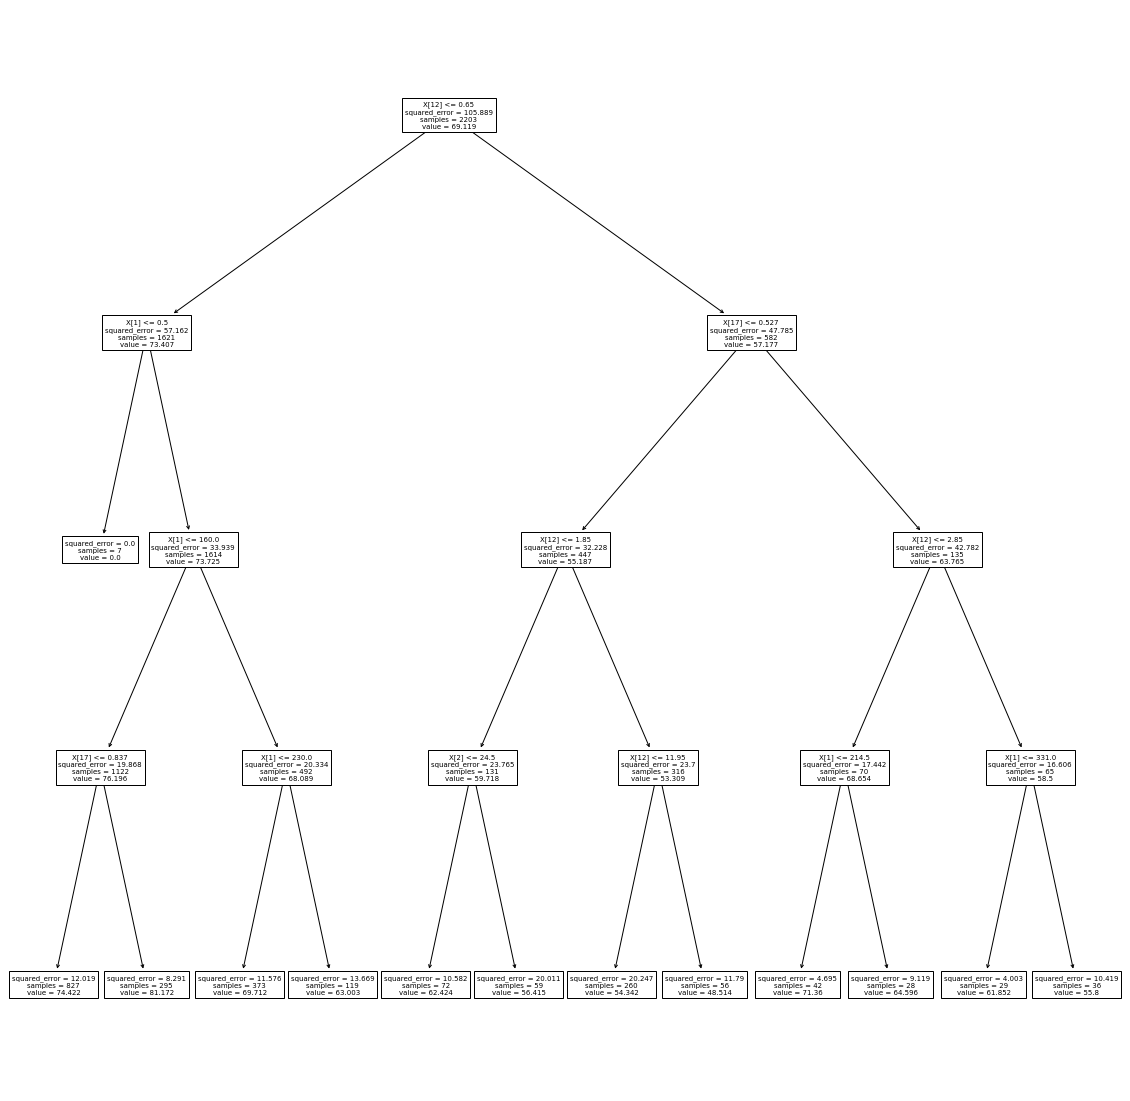

In [10]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
plot_tree(tree)

In [11]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor(n_estimators=100)
forest.fit(features_train, targets_train)
(forest.score(features_train, targets_train), forest.score(features_test, targets_test))

(0.995866790248839, 0.9628308176992773)

In [12]:
from sklearn.neural_network import MLPRegressor

mlp = MLPRegressor()
mlp.fit(features_train, targets_train)
(mlp.score(features_train, targets_train), mlp.score(features_test, targets_test))

(-67324680.75334524, -211166257.03017733)

In [13]:
features_train.shape

(2203, 214)

In [14]:
import tensorflow as tf
from tensorflow.keras.models import Sequential

features_train = (features_train - features_train.mean())/(features_train.std())
features_test = (features_test - features_test.mean())/(features_test.std())

features_train_tensor = tf.convert_to_tensor(features_train)
features_test_tensor = tf.convert_to_tensor(features_test)
targets_train_tensor = tf.convert_to_tensor(targets_train)
targets_test_tensor = tf.convert_to_tensor(targets_test)




2022-11-11 08:59:14.787676: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [15]:
from tensorflow.keras.layers import Dense
keras = Sequential([Dense(214, activation='sigmoid'),Dense(100, activation='sigmoid'), Dense(1, activation='sigmoid')])
keras.compile(loss=tf.keras.losses.MeanSquaredError(), metrics=['accuracy'])
keras.fit(x=features_train_tensor, y=targets_train_tensor, batch_size=10, epochs=10)

2022-11-11 08:59:14.957281: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/10
221/221 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0032
Epoch 2/10
221/221 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0032
Epoch 3/10
221/221 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0032
Epoch 4/10
221/221 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0032
Epoch 5/10
221/221 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0032
Epoch 6/10
221/221 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0032
Epoch 7/10
221/221 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0032
Epoch 8/10
221/221 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0032
Epoch 9/10
221/221 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0032
Epoch 10/10
221/221 [==============================] - 1s 3ms/step - loss: nan - accuracy: 0.0032
